# arithmetic operations on images using opencv
atithmetic operations such as addiation,subtraction, and bitwise operations(AND,) are fundamental techniques in images processing with opencv. these operations allow for the enhancement, analysis transformation of image characteristics, making them essentials for tasks like image clarification, thresholding,dilation and more

# step by step implementation
Let's see the step by step implementation of arithmetic operations.

step1: install required libraries and import necessary packages

- opencv: python(cv2) core library for image processing and computer vision.
- matplotlib.pyplot: for displaying images inside the notebook
- numpy: efficient array operatoins


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


step2: upload the input images
files.upload()=> opens a dialog to pick files from our device
cv2.imread()=> reads an image from disk and loads it as numpy array(in BGR color ordering by default)

In [2]:
img1 = cv2.imread('birds1.jpeg')
img2 = cv2.imread('birds2.jpeg')

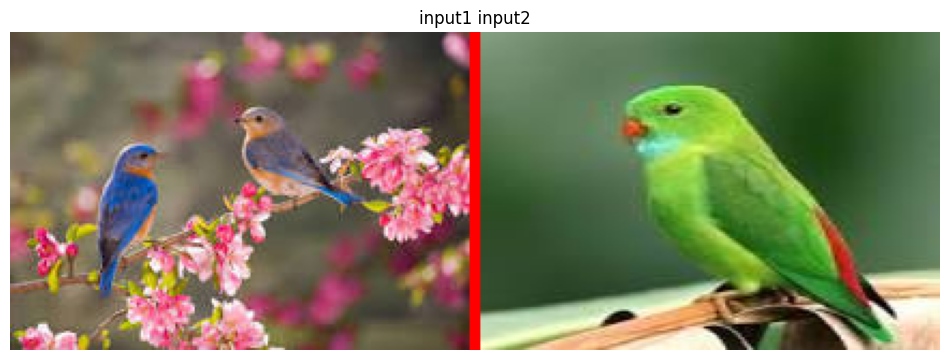

In [8]:
if img1.shape != img2.shape:
    img2 = cv2.resize(img2,(img1.shape[1],img1.shape[0]))
    
line_thickness = 5
height = img1.shape[0]
line = np.full((height,line_thickness,3),(0,0,255),dtype=np.uint8)
side_by_side = np.hstack((img1,line,img2))
side_by_side_rgb = cv2.cvtColor(side_by_side,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,6))
plt.imshow(side_by_side_rgb)
plt.title("input1 input2")
plt.axis("off")
plt.show()

step4: perform operations

1. Image Addition
cv2.add(): adds pixel values with saturation

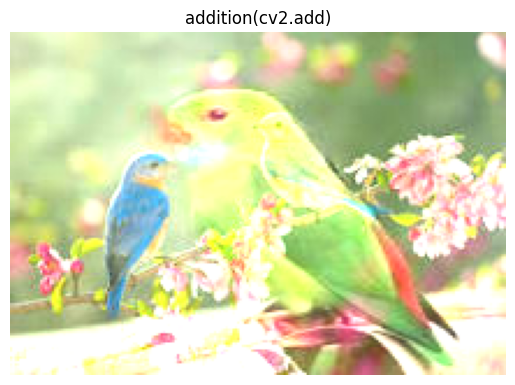

In [11]:
added = cv2.add(img1,img2)
added_rgb = cv2.cvtColor(added,cv2.COLOR_BGR2RGB)
plt.imshow(added_rgb)
plt.title("addition(cv2.add)")
plt.axis("off")
plt.show()

weighted addiation
cv2.addWeighted(): Blends two images by specified wights and optional scalar.
parameters:
- img1,img2: input images
- 0.7,0.3: weights (how much each image contributes)
- 0: gamma(brightness adjustment)

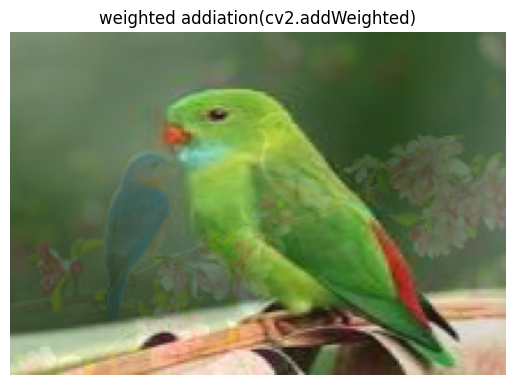

In [13]:
weighted = cv2.addWeighted(img1,0.2,img2,0.8,0)
weighted_rgb = cv2.cvtColor(weighted,cv2.COLOR_BGR2RGB)
plt.imshow(weighted_rgb)
plt.title("weighted addiation(cv2.addWeighted)")
plt.axis("off")
plt.show()

Image Subtraction
- cv2.subtract(): Subtracts each pixel in img2 from img1(clips negative values to 0)
- used for change detection, background subtraction, etc.


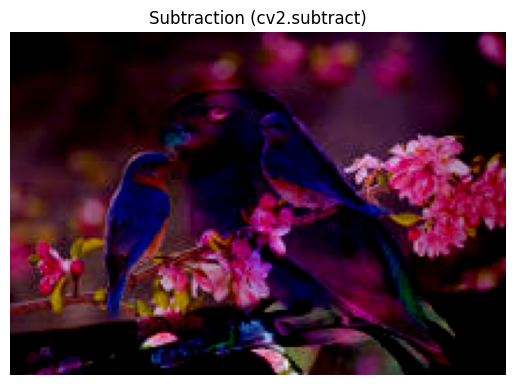

In [14]:
subtracted = cv2.subtract(img1,img2)
subtracted_rgb = cv2.cvtColor(subtracted,cv2.COLOR_BGR2RGB)
plt.imshow(subtracted_rgb)
plt.title("Subtraction (cv2.subtract)")
plt.axis('off')
plt.show()

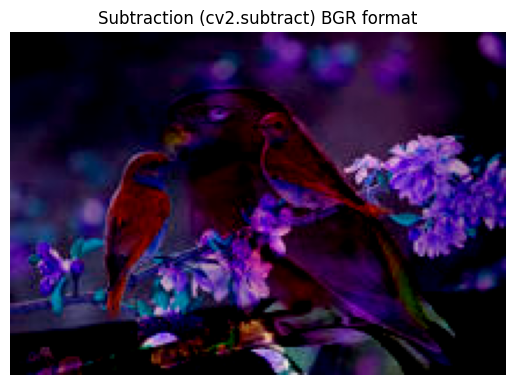

In [16]:
subtracted = cv2.subtract(img1,img2)
# subtracted_rgb = cv2.cvtColor(subtracted,cv2.COLOR_BGR2RGB)
plt.imshow(subtracted)
plt.title("Subtraction (cv2.subtract) BGR format")
plt.axis('off')
plt.show()

3. Bitwise operations
3.1 Bitwise AND
    cv2.bitwise_and() => only keeps pixels where both images have bits 'on'

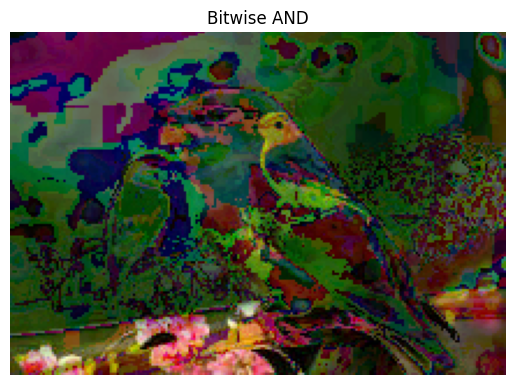

In [17]:
and_img = cv2.bitwise_and(img1, img2)
and_img_rgb = cv2.cvtColor(and_img, cv2.COLOR_BGR2RGB)

plt.imshow(and_img_rgb)
plt.title('Bitwise AND')
plt.axis('off')
plt.show()

3.2 Bitwise or
    cv2.bitwise_or(): keeps pixels if eitther image has a bit "on"

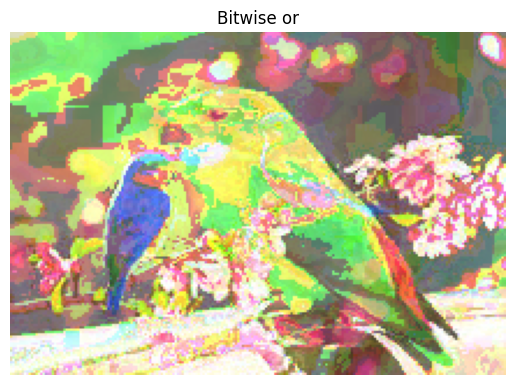

In [18]:
or_img = cv2.bitwise_or(img1,img2)
or_img_rgb = cv2.cvtColor(or_img,cv2.COLOR_BGR2RGB)

plt.imshow(or_img_rgb)
plt.title("Bitwise or")
plt.axis('off')
plt.show()

3.3 Bitwise XOR
    cv2.bitwise_xor(): keeps pixels if only one image(not both has a bit "on")

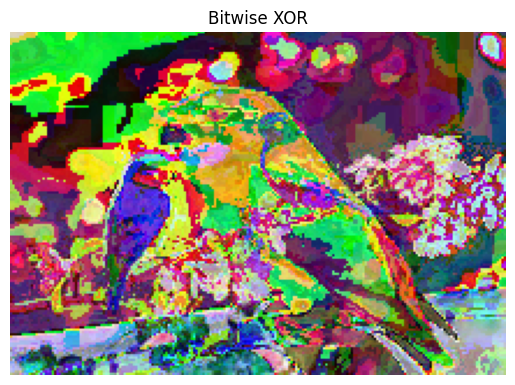

In [19]:
xor_img = cv2.bitwise_xor(img1,img2)
xor_img_rgb = cv2.cvtColor(xor_img,cv2.COLOR_BGR2RGB)

plt.imshow(xor_img_rgb)
plt.title("Bitwise XOR")
plt.axis('off')
plt.show()

3.4 Bitwise Not
    cv2.bitwise_not()=> keeps pixels of only one images(not both) has a bit "on"

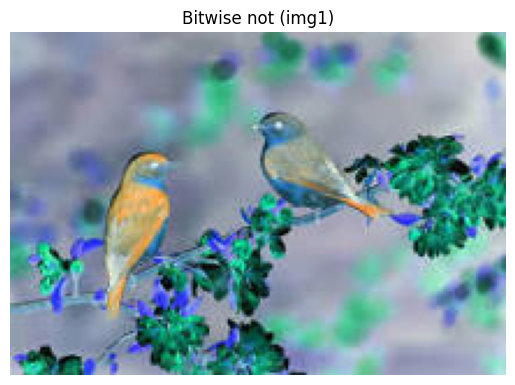

In [20]:
not_img = cv2.bitwise_not(img1)
not_img_rgb = cv2.cvtColor(not_img,cv2.COLOR_BGR2RGB)

plt.imshow(not_img_rgb)
plt.title("Bitwise not (img1)")
plt.axis('off')
plt.show()

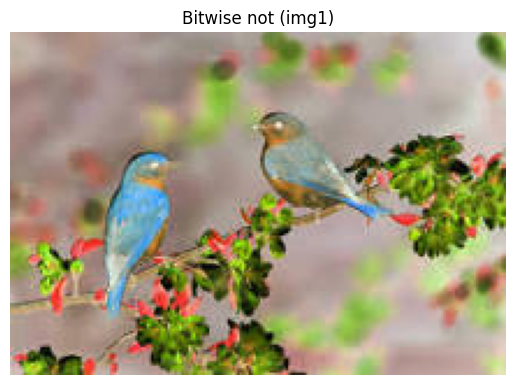

In [21]:
not_img = cv2.bitwise_not(img1)
# not_img_rgb = cv2.cvtColor(not_img,cv2.COLOR_BGR2RGB)

plt.imshow(not_img)
plt.title("Bitwise not (img1)")
plt.axis('off')
plt.show()

Good question 👍 Let’s clear up the confusion between **BGR** and **RGB** because it trips up many beginners in OpenCV.

---

# 🔵🟢🔴 BGR vs. RGB

### 1. **RGB (Red, Green, Blue)**

* The **standard color model** used in most systems (computers, monitors, cameras, web).
* Each pixel is defined by three values: **R, G, B** (0–255).
* Example:

  ```python
  (255, 0, 0) → Pure Red
  (0, 255, 0) → Pure Green
  (0, 0, 255) → Pure Blue
  ```

---

### 2. **BGR (Blue, Green, Red)**

* OpenCV by default uses **BGR order instead of RGB** when reading images (`cv2.imread`).
* This was inherited from older Intel Image Processing libraries.
* Example:

  ```python
  (255, 0, 0) → Pure Blue (not Red!)
  (0, 255, 0) → Pure Green
  (0, 0, 255) → Pure Red
  ```

---

### 3. **Key Differences**

| Feature             | RGB                                                  | BGR (OpenCV default) |
| ------------------- | ---------------------------------------------------- | -------------------- |
| Used by             | Most image libraries (PIL, matplotlib, web browsers) | OpenCV (cv2)         |
| Channel order       | Red → Green → Blue                                   | Blue → Green → Red   |
| Example pixel (Red) | (255, 0, 0)                                          | (0, 0, 255)          |

---

### 4. **Conversion Between BGR and RGB in OpenCV**

```python
import cv2

img_bgr = cv2.imread("image.jpg")              # OpenCV reads in BGR
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # Convert to RGB
```

---

### 5. **When It Matters**

* If you use **matplotlib** (`plt.imshow`), it expects **RGB**.

  * If you pass a BGR image → colors look weird (blue instead of red).
* If you use **cv2.imshow**, it’s fine because OpenCV understands BGR.

---

⚡ **Quick tip:** Always convert with

```python
cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
```

before using matplotlib.

---

👉 Do you want me to show you a **side-by-side visualization** (same image in BGR vs RGB) so you can see the difference clearly?


Perfect 👍 You want a **full explanation of BGR vs RGB** and how this matters for **object detection** in OpenCV. Let’s go deep:

---

# 🔵🟢🔴 RGB vs. BGR in OpenCV

### 1. **RGB (Red, Green, Blue)**

* Standard **color model** used in computers, cameras, and web.
* Each pixel has **3 values**: `[R, G, B]` → ranges from `0–255`.
* Example:

  * **Red** → `(255, 0, 0)`
  * **Green** → `(0, 255, 0)`
  * **Blue** → `(0, 0, 255)`

👉 RGB is **human-friendly** (matches how colors are displayed on screens).

---

### 2. **BGR (Blue, Green, Red)**

* OpenCV internally uses **BGR order** by default.
* Pixel values are stored as `[B, G, R]`.
* Example:

  * **Red in BGR** = `(0, 0, 255)`
  * **Blue in BGR** = `(255, 0, 0)`

👉 This is just a **channel order difference** (no actual change in image colors, only how they are interpreted).

---

### 3. **Why the Difference Exists**

* **OpenCV (BGR)**: Inherited from early Intel image libraries → BGR was more efficient for memory alignment.
* **Most other libraries (RGB)**: PIL, matplotlib, web standards → RGB is standard.

So, if you display an OpenCV BGR image in matplotlib without conversion → colors look swapped (red ↔ blue).

---

# 🎯 Impact on Object Detection

When detecting objects based on color, you must **know which mode you are working in**.

---

### ✅ Example: Detect Red Object in **BGR**

```python
import cv2
import numpy as np

img = cv2.imread("ball.jpg")  # BGR image

# Define red color range in BGR
lower_red = np.array([0, 0, 120])
upper_red = np.array([100, 100, 255])

mask = cv2.inRange(img, lower_red, upper_red)
result = cv2.bitwise_and(img, img, mask=mask)

cv2.imshow("Red Object Detection (BGR)", result)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

---

### ✅ Example: Detect Red Object in **RGB**

```python
import cv2
import numpy as np

img_bgr = cv2.imread("ball.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Define red color range in RGB
lower_red = np.array([120, 0, 0])
upper_red = np.array([255, 100, 100])

mask = cv2.inRange(img_rgb, lower_red, upper_red)
result = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)

cv2.imshow("Red Object Detection (RGB)", cv2.cvtColor(result, cv2.COLOR_RGB2BGR))
cv2.waitKey(0)
cv2.destroyAllWindows()
```

---

# ⚡ Which Should You Use?

* **RGB** → better when working with **matplotlib, PIL, deep learning models (TensorFlow, PyTorch)**.
* **BGR** → default in **OpenCV** (useful if you’re only working inside OpenCV).
* **HSV (Hue, Saturation, Value)** → BEST for **object detection** because it separates **color from brightness**, making it more robust to lighting changes.

👉 Example: Detecting a red ball in a dark vs bright room works better in **HSV** than BGR/RGB.

---

✅ **Summary**

* RGB = standard everywhere (but not OpenCV default).
* BGR = OpenCV’s internal default.
* For **object detection**, use `cv2.cvtColor(img, cv2.COLOR_BGR2HSV)` and detect based on **HSV ranges**.

---

Would you like me to create a **side-by-side visualization** (same object detection done in **BGR, RGB, and HSV**) so you can clearly see why HSV is superior for object tracking?


Great question 🚀 You’re asking about **bitwise operations on binary images** in OpenCV.
This is very useful in **masking, blending, and combining objects**. Let’s break it down:

---

# 🧩 Bitwise Operations in OpenCV

OpenCV provides four main bitwise operations:

1. **cv2.bitwise\_and(img1, img2, mask=None)**
   → Keeps only the overlapping (white) regions between two images/masks.

2. **cv2.bitwise\_or(img1, img2, mask=None)**
   → Combines regions (white if present in either image).

3. **cv2.bitwise\_xor(img1, img2, mask=None)**
   → Keeps non-overlapping white regions only.

4. **cv2.bitwise\_not(img)**
   → Inverts (black → white, white → black).

---

# 🖼 Example with Binary Images

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create two binary images (black background, white shapes)
img1 = np.zeros((300, 300), dtype="uint8")
img2 = np.zeros((300, 300), dtype="uint8")

# Draw shapes
cv2.rectangle(img1, (50, 50), (250, 250), 255, -1)   # White square
cv2.circle(img2, (150, 150), 100, 255, -1)          # White circle

# Apply bitwise operations
bit_and = cv2.bitwise_and(img1, img2)
bit_or  = cv2.bitwise_or(img1, img2)
bit_xor = cv2.bitwise_xor(img1, img2)
bit_not = cv2.bitwise_not(img1)

# Plot results
titles = ["Image 1 (Square)", "Image 2 (Circle)", "AND", "OR", "XOR", "NOT (Square)"]
images = [img1, img2, bit_and, bit_or, bit_xor, bit_not]

plt.figure(figsize=(10,6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.show()
```

---

# 🎯 Applications in Image Processing

1. **Masking objects** – Extract a region of interest (ROI) using `bitwise_and`.
2. **Combining masks** – Merge multiple binary masks with `bitwise_or`.
3. **Finding differences** – Highlight regions where images differ with `bitwise_xor`.
4. **Inversion** – Create negative images or background masks with `bitwise_not`.
5. **Object detection** – Apply masks on color images to keep only detected areas.

---

✅ Example: Apply a mask on an image

```python
img = cv2.imread("flower.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Mask for red color
lower = np.array([0, 120, 70])
upper = np.array([10, 255, 255])
mask = cv2.inRange(hsv, lower, upper)

# Keep only red parts
res = cv2.bitwise_and(img, img, mask=mask)

cv2.imshow("Original", img)
cv2.imshow("Mask", mask)
cv2.imshow("Result", res)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

---

👉 Do you want me to also explain **how bitwise operations differ from logical operators (`&`, `|`, `^`, `~`) in NumPy**? That’s another common confusion.
